# Presentación de la empresa, organización o problema específico.
Decidimos elegir el dataset de una empresa que brinda un servicio de excelencia en la distribución de paquetería con envíos nacionales e internacionales, el cual facilita al cliente en las actividades de abastecimiento de insumos y venta de productos. Cuenta con personal altamente capacitado y profesional que constituye la mejor garantía de calidad, eficiencia y rapidez en el servicio preferencial diariamente.


**Problema en específico**
En el día a día es importante estudiar todas las variables que puedan afectar las operaciones de la empresa en especial la del precio del paquete a enviar, por eso es importante poder determinar un modelo que pueda ayudar a analizar el precio, según su peso y los tipos de servicio que existen dentro de la organización, son tantos los factores que pueden ocasionar alguna variación en el precio que si no estamos pendientes puede ocasionar pérdida de clientes en un mercado donde existe bastante competencia. 



**Preguntas y objetivos del proyecto**
- ¿Qué datos son necesarios?
- ¿Cuáles son las variables que pueden fijar el precio del envío? 


**Objetivo**

Crear un sistema o modelo de Machine Learning en especial de Algoritmos de regresión para poder predecir el precio del envío, tomando en cuenta su peso y valor.


**Conformación del equipo de trabajo**

Isley Geraldin Fuentes Daza

Jennifer Carolyn Salazar Salazar


**Indicación de la fuente del Dataset y criterio de selección.**
La fuente del dataset es de una empresa donde alguno de los integrantes trabaja, por lo tanto, logró aportarla y le enmascaramos algunos datos sensibles para poder trabajar con tranquilidad.



**Variables seleccionadas para realizar el análisis**


**Nombre Cliente:** Datos específicos del cliente

**País de destino:** Dirección a donde se envía

**Service Type:** Tipo de servicio 1=Prioridad, 2=Regular, 3=Estandar 

**Peso verificado:** La cantidad que pesa el paquete

**Valor:** Precio declarado

**Items por cantidad:** Número de paquetes

**Tarifa servicio (USD):** precio de servicio en dólares (Target)

**Year:** Año en que se realizó el envió.



# Data Acdquisition

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_envios = pd.read_csv("Envios.csv", index_col=0, sep=";", encoding="latin-1")
df_envios.head()

df_envios.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 148152 entries, 3 to 3
Data columns (total 20 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Nombre_Cliente                  148152 non-null  object 
 1   País de destino                 148152 non-null  object 
 2   AWB                             148152 non-null  object 
 3   Nro. de despacho                148152 non-null  int64  
 4   Tracking Number                 148152 non-null  object 
 5   Order ID                        148152 non-null  object 
 6   ServiceType                     148152 non-null  int64  
 7   Peso_verificado                 148152 non-null  int64  
 8   Valor                           148152 non-null  float64
 9   Items por cantidad              148152 non-null  int64  
 10  Comprador                       148152 non-null  object 
 11  Origin Warehouse Code           148152 non-null  object 
 12  Proveedor            

Verificamos si existen nulos y duplicados.

In [ ]:
df_envios.isnull().sum()

Nombre_Cliente                    0
País de destino                   0
AWB                               0
Nro. de despacho                  0
Tracking Number                   0
Order ID                          0
ServiceType                       0
Peso_verificado                   0
Valor                             0
Items por cantidad                0
Comprador                         0
Origin Warehouse Code             0
Proveedor                         0
Fecha primer evento controlado    0
Fecha último evento               0
Último evento                     0
First Clockstop (CS)              0
CS Date                           0
Tarifaservicio(USD)               0
Year                              0
dtype: int64

In [ ]:
df = df_envios.duplicated().sum()
print(df)
print("Sin duplicados")

0
Sin duplicados


In [ ]:
df_envios.describe(include="all").T

count  unique  \
Nombre_Cliente                    148152       3   
País de destino                   148152       6   
AWB                               148152     846   
Nro. de despacho                148152.0     NaN   
Tracking Number                   148152  109456   
Order ID                          148152  148152   
ServiceType                     148152.0     NaN   
Peso_verificado                 148152.0     NaN   
Valor                           148152.0     NaN   
Items por cantidad              148152.0     NaN   
Comprador                         148152  115486   
Origin Warehouse Code             148152       5   
Proveedor                         148152      14   
Fecha primer evento controlado    148152     413   
Fecha último evento               148152     755   
Último evento                     148152      17   
First Clockstop (CS)              148152     167   
CS Date                           148152     751   
Tarifaservicio(USD)             148152.0     NaN   
Year                            148152.0     NaN   

                                                                 top    freq  \
Nombre_Cliente                                                   TIA   98628   
País de destino                                            Argentina   84796   
AWB                                                     157-10301642    3627   
Nro. de despacho                                                 NaN     NaN   
Tracking Number                                             5,33E+13   38697   
Order ID                                                  2500185326       1   
ServiceType                                                      NaN     NaN   
Peso_verificado                                                  NaN     NaN   
Valor                                                            NaN     NaN   
Items por cantidad                                               NaN     NaN   
Comprador                       Italo Almeida Italo   Almeida Fialho     120   
Origin Warehouse Code                                            WHC   96495   
Proveedor                                                         CA   84796   
Fecha primer evento controlado                            21/12/2020    2903   
Fecha último evento                                       27/11/2020    2488   
Último evento                             Entregado/Delivered [PF-1]  142422   
First Clockstop (CS)                            ENTREGADO (PF-1-031)   63920   
CS Date                                                   27/11/2020    2453   
Tarifaservicio(USD)                                              NaN     NaN   
Year                                                             NaN     NaN   

                                       mean         std     min     25%  \
Nombre_Cliente                          NaN         NaN     NaN     NaN   
País de destino                         NaN         NaN     NaN     NaN   
AWB                                     NaN         NaN     NaN     NaN   
Nro. de despacho                 219.743027  178.916598     0.0    84.0   
Tracking Number                         NaN         NaN     NaN     NaN   
Order ID                                NaN         NaN     NaN     NaN   
ServiceType                        1.858989    0.349659     1.0     2.0   
Peso_verificado                  573.914365  491.720875     1.0   178.0   
Valor                             38.045088   34.874539    0.19   19.29   
Items por cantidad                 1.231951    0.624599     1.0     1.0   
Comprador                               NaN         NaN     NaN     NaN   
Origin Warehouse Code                   NaN         NaN     NaN     NaN   
Proveedor                               NaN         NaN     NaN     NaN   
Fecha primer evento controlado          NaN         NaN     NaN     NaN   
Fecha último evento                     NaN         NaN     NaN     NaN   
Último evento                           NaN         NaN     N

# Análisis Univariado

Graficamos para ver el comportamiento del Tipo de servicio asi ver el más usado. 

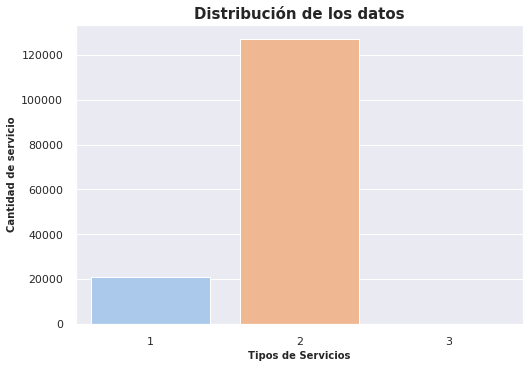

In [ ]:
sns.countplot(x=df_envios.ServiceType, palette="pastel")
plt.xlabel("Tipos de Servicios", fontsize=10, fontweight='bold')
plt.ylabel("Cantidad de servicio", fontsize=10, fontweight='bold')
plt.title("Distribución de los datos", fontweight = 'bold', fontsize='15')
plt.show()

Frecuencia variable Tarifa servicio (USD)

In [ ]:
import sidetable
df_envios.stb.freq(["Tarifaservicio(USD)"])

Tarifaservicio(USD)  count   percent  cumulative_count  \
0                   12.82   1041  0.702657              1041   
1                   11.60   1036  0.699282              2077   
2                   17.05    891  0.601409              2968   
3                   14.30    837  0.564960              3805   
4                    6.00    786  0.530536              4591   
...                   ...    ...       ...               ...   
2454                 2.62      1  0.000675            148148   
2455                 2.60      1  0.000675            148149   
2456                 2.58      1  0.000675            148150   
2457                 2.54      1  0.000675            148151   
2458                 2.50      1  0.000675            148152   

      cumulative_percent  
0               0.702657  
1               1.401939  
2               2.003348  
3               2.568308  
4               3.098844  
...                  ...  
2454           99.997300  
2455           99.997975  
2456           99.998650  
2457           99.999325  
2458          100.000000  

[2459 rows x 5 columns]

# Análisis Bivariado

Procedemos a evaluar el comportamiento del target con el resto de las variables

In [ ]:
!pip install sidetable

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pandas.core.dtypes.common import is_numeric_dtype
import math

def sturges_intervals(data):
  k = 1 + 3.322 * math.log10(len(data))
  periodos = math.ceil(k)

  intervals = pd.interval_range(
      start=data.min(),
      end=data.max() + 1,
      periods=k,
      name="Intervalo",
      closed="left")
  
  inter = pd.IntervalIndex([
    pd.Interval( round(i.left,1), round(i.right,1), i.closed )
    for i in intervals])
  
  return inter, periodos


def freq_table(df_envios, col, with_cuts=True):

  data = df_envios[col]

  if not is_numeric_dtype(data) or not with_cuts:
    freq_tab = pd.crosstab(data, columns='FreqAbs').sort_values('FreqAbs', ascending=False)
  
  else:

    freq_tab = pd.DataFrame(index=sturges_intervals(data)[0])
    freq_tab["FreqAbs"] = pd.cut(data, bins=freq_tab.index).value_counts()
    freq_tab["Marca"]  = freq_tab.index.mid

    freq_tab["LimInf"] = freq_tab.index.left
    freq_tab["LimSup"] = freq_tab.index.right

  
  freq_tab['FreqRel'] = freq_tab['FreqAbs'] / freq_tab['FreqAbs'].sum()
  freq_tab[['FAbsAcumulada', 'FAbsRelativa']] = freq_tab[['FreqAbs','FreqRel']].cumsum()
  return freq_tab

Creación de tabla de frecuncia y creación de intervalos para graficar

In [ ]:
freq_table(df_envios, "Tarifaservicio(USD)", with_cuts=True) 

FreqAbs  Marca  LimInf  LimSup   FreqRel  FAbsAcumulada  \
[2.5, 4.1)        721   3.30     2.5     4.1  0.004867            721   
[4.1, 5.7)      14107   4.90     4.1     5.7  0.095220          14828   
[5.7, 7.2)      23842   6.45     5.7     7.2  0.160929          38670   
[7.2, 8.8)      21478   8.00     7.2     8.8  0.144973          60148   
[8.8, 10.4)     17514   9.60     8.8    10.4  0.118216          77662   
[10.4, 12.0)    19311  11.20    10.4    12.0  0.130346          96973   
[12.0, 13.6)    14446  12.80    12.0    13.6  0.097508         111419   
[13.6, 15.2)    10545  14.40    13.6    15.2  0.071177         121964   
[15.2, 16.8)     7600  16.00    15.2    16.8  0.051299         129564   
[16.8, 18.3)     6850  17.55    16.8    18.3  0.046236         136414   
[18.3, 19.9)     5891  19.10    18.3    19.9  0.039763         142305   
[19.9, 21.5)     3262  20.70    19.9    21.5  0.022018         145567   
[21.5, 23.1)      647  22.30    21.5    23.1  0.004367         146214   
[23.1, 24.7)      626  23.90    23.1    24.7  0.004225         146840   
[24.7, 26.2)      513  25.45    24.7    26.2  0.003463         147353   
[26.2, 27.8)      458  27.00    26.2    27.8  0.003091         147811   
[27.8, 29.4)      271  28.60    27.8    29.4  0.001829         148082   
[29.4, 31.0)       70  30.20    29.4    31.0  0.000472         148152   

              FAbsRelativa  
[2.5, 4.1)        0.004867  
[4.1, 5.7)        0.100086  
[5.7, 7.2)        0.261016  
[7.2, 8.8)        0.405988  
[8.8, 10.4)       0.524205  
[10.4, 12.0)      0.654551  
[12.0, 13.6)      0.752059  
[13.6, 15.2)      0.823236  
[15.2, 16.8)      0.874534  
[16.8, 18.3)      0.920771  
[18.3, 19.9)      0.960534  
[19.9, 21.5)      0.982552  
[21.5, 23.1)      0.986919  
[23.1, 24.7)      0.991144  
[24.7, 26.2)      0.994607  
[26.2, 27.8)      0.997698  
[27.8, 29.4)      0.999528  
[29.4, 31.0)      1.000000

In [ ]:
sturges_intervals(df_envios[df_envios["Tarifaservicio(USD)"]<21.5]["Tarifaservicio(USD)"])[1]

19

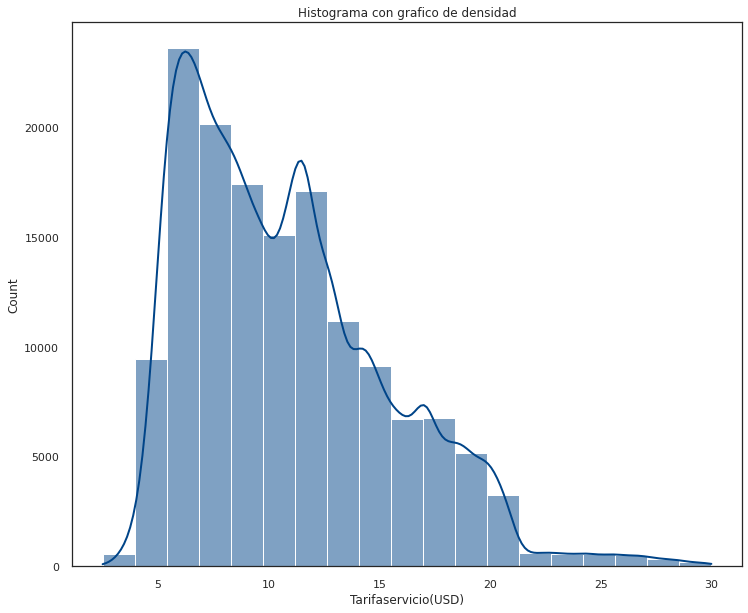

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white", rc={"lines.linewidth": 2})
fig, axes = plt.subplots(figsize=(12,10))
sns.histplot(x="Tarifaservicio(USD)", data=df_envios[df_envios["Tarifaservicio(USD)"]<100].set_index("Order ID"), color='#004488', ax=axes,bins= sturges_intervals(df_envios[df_envios["Valor"]<100]["Valor"])[1], kde=True).set(title='Histograma con grafico de densidad');

Densidad acumulada entre 5(USD) a 10(USD) con otro pico aprox. en 12(USD)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


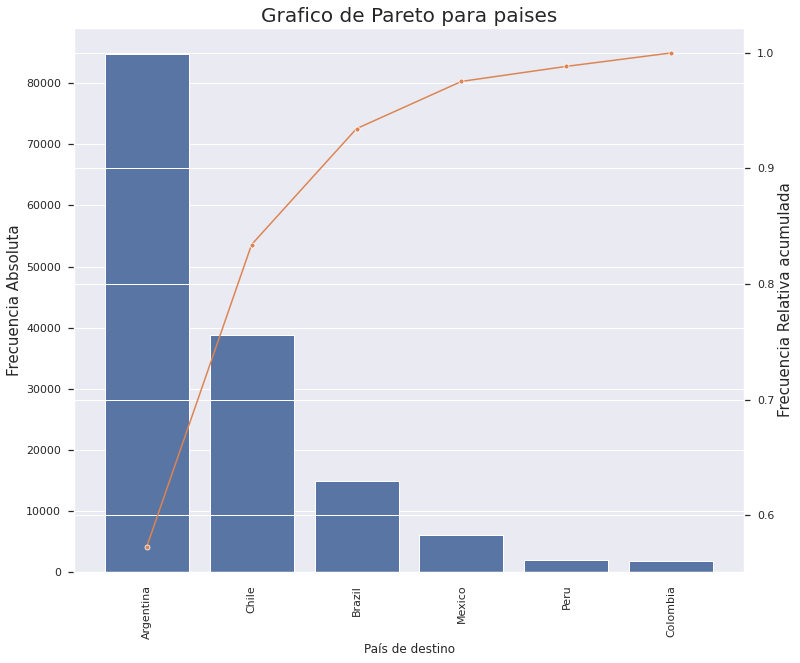

In [ ]:

sns.set()
fig, axes = plt.subplots(figsize=(12,10))

paises = freq_table(df_envios, "País de destino", with_cuts=False).reset_index().sort_values('FreqAbs', ascending=False)

sns.barplot(data=paises, x="País de destino", y='FreqAbs', ax=axes, color="C0")
ax2 = axes.twinx()
sns.lineplot(paises["País de destino"], paises["FAbsRelativa"], color="C1", marker="o", ms=5, ax=ax2)
axes.set_title('Grafico de Pareto para paises', fontsize = 20)
axes.set_ylabel('Frecuencia Absoluta', fontsize=15)
ax2.set_ylabel('Frecuencia Relativa acumulada', fontsize=15)
axes.tick_params(axis='x', rotation=90)
plt.show()
sns.set()

Se aplica un diagrama de Pareto para la frecuencia, por paises.

El país con mayor consumo es Argentina.
Pagos realizados entre 5(USD) a 12(USD)

Creamos una correlación entre las variables y determinar cuales tienen mayor relación.

In [ ]:
matrix_correlation = df_envios.corr()
matrix_correlation.head()

Nro. de despacho  ServiceType  Peso_verificado     Valor  \
Nro. de despacho            1.000000     0.010239        -0.154709 -0.255206   
ServiceType                 0.010239     1.000000        -0.142059 -0.119271   
Peso_verificado            -0.154709    -0.142059         1.000000  0.329342   
Valor                      -0.255206    -0.119271         0.329342  1.000000   
Items por cantidad         -0.190891    -0.019203         0.203381  0.211011   

                    Items por cantidad  Tarifaservicio(USD)      Year  
Nro. de despacho             -0.190891             0.166848  0.119841  
ServiceType                  -0.019203            -0.215019 -0.042101  
Peso_verificado               0.203381             0.758543 -0.023845  
Valor                         0.211011             0.188400 -0.112334  
Items por cantidad            1.000000             0.094705 -0.031177

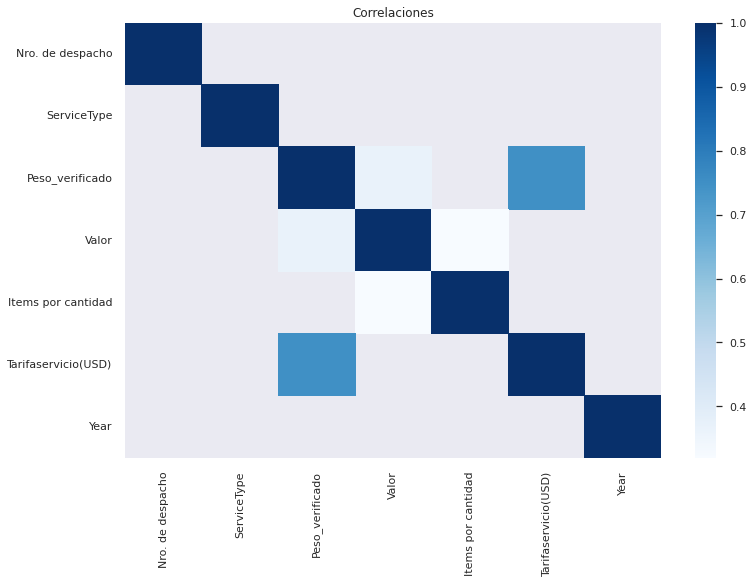

In [ ]:
mat_corr_spearman = df_envios.corr('spearman')

high_corr = mat_corr_spearman[mat_corr_spearman>=.3]
plt.figure(figsize=(12,8))
sns.heatmap(high_corr, cmap="Blues")
plt.title('Correlaciones');

In [ ]:
def corrFilter(x: pd.DataFrame, thres: float):
 
    xCorr = x.corr('spearman')
    xFiltered = xCorr[((xCorr >= thres) | (xCorr <= -thres)) & (xCorr !=1.000)]
    xFlattened = xFiltered.unstack().drop_duplicates().reset_index().sort_values(0, ascending= False).dropna()
    xFlattened.columns = ['Variable_1', 'Variable_2', 'corr_value']
    return xFlattened

corrFilter(df_envios, .2)


Variable_1           Variable_2  corr_value
3   Peso_verificado  Tarifaservicio(USD)    0.750024
2   Peso_verificado                Valor    0.369959
4             Valor   Items por cantidad    0.320054
5             Valor  Tarifaservicio(USD)    0.276370
1  Nro. de despacho                Valor   -0.276374

Se observa que el Peso tiene influencia en la tarifa, por lo que su correlación es mas alta.
Obviamente el peso determina cuanto costará cada envio en función a su tarifa.
Para corroborar el tipo de servicio en cuanto a al Pais de destino realizamos un croostab, el cual efectivamente nos certifica lo anteriormente mencionado.

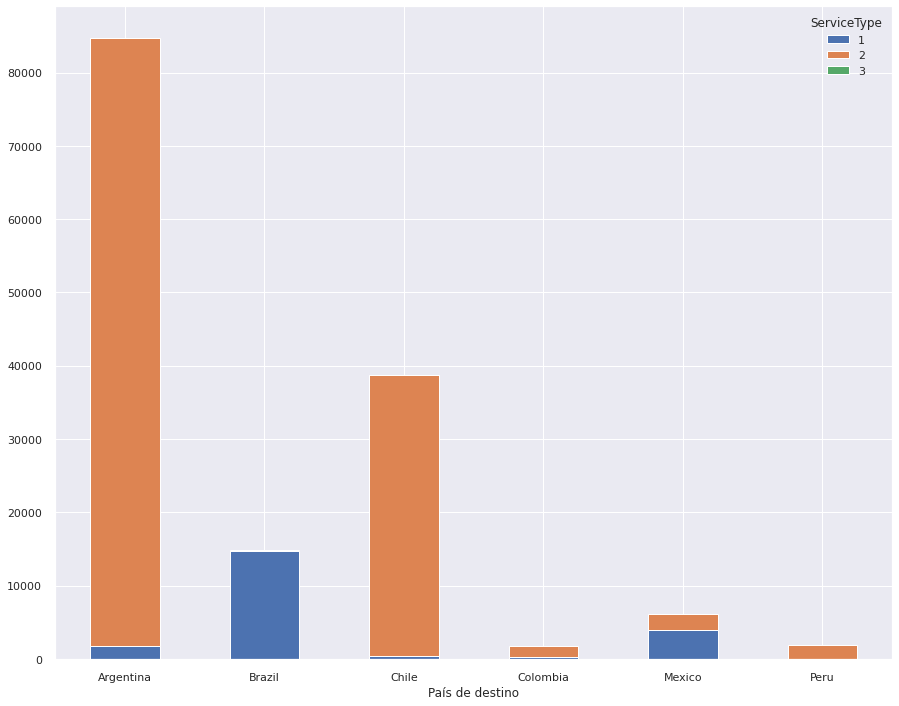

In [ ]:
cross = pd.crosstab(df_envios["País de destino"] , df_envios["ServiceType"])
cross.plot(kind="bar", stacked=True, rot=0, figsize=(15,12));

Determinamos la relación entre nuestras variables principales y el target

# Análisis Multivariado

In [ ]:
df_envios.shape

(148152, 20)

<function matplotlib.pyplot.show(*args, **kw)>

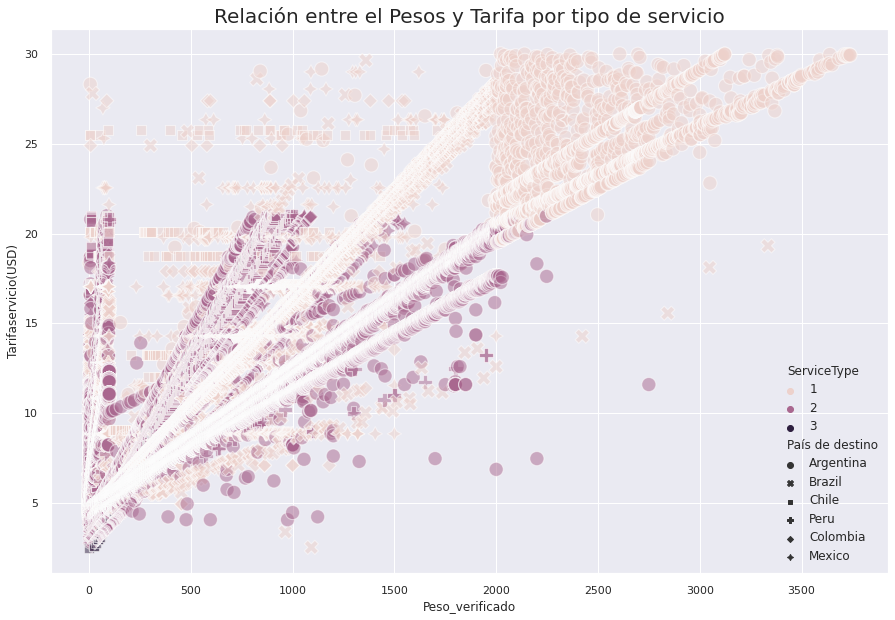

In [ ]:
plt.figure(figsize= (15,10))
sns.scatterplot(data=df_envios, x="Peso_verificado", y="Tarifaservicio(USD)", color = "g", hue="ServiceType", style="País de destino", s=200, alpha=0.5)
plt.title("Relación entre el Pesos y Tarifa por tipo de servicio",size=20)
plt.show

Se determina una relación de regresión.
Concentración en datos de valor bajo.

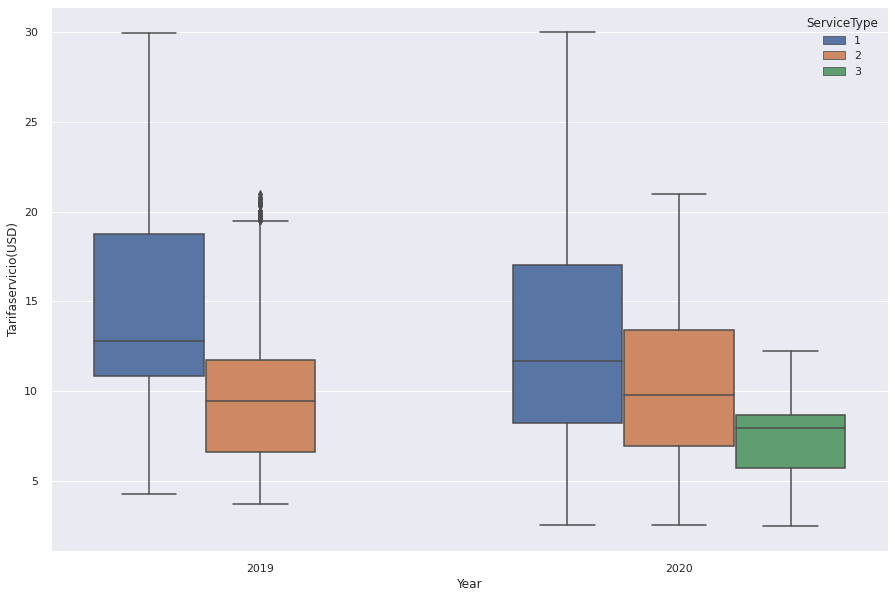

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(x=df_envios["Year"], y=df_envios["Tarifaservicio(USD)"], hue=df_envios["ServiceType"])

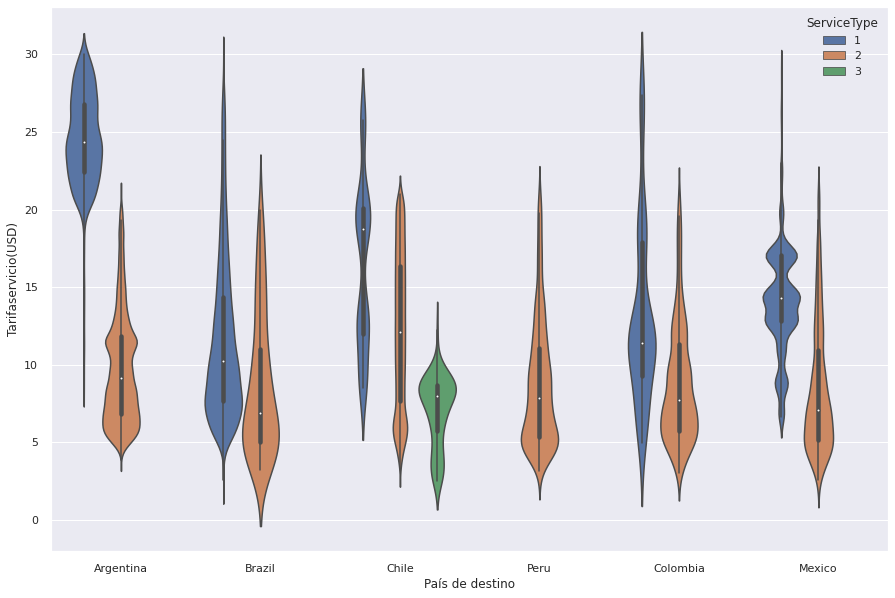

In [ ]:
plt.figure(figsize=(15,10))
sns.violinplot(x=df_envios["País de destino"], y=df_envios["Tarifaservicio(USD)"], hue=df_envios["ServiceType"])

Podemos concluir que Argentina utiliza más los envios con prioridad y regular, vemos el país de Chile usando los servicios estandar registrados en el 2020

# Metricas de Regresión

Para el calculo de errores cuentitativos utilizando Pepeline para todas las transformaciones.

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np

sns.set()
df_envios = pd.read_csv("Envios.csv", index_col=0, sep=";", encoding="latin-1")
df_envios.head()

Nombre_Cliente País de destino           AWB  Nro. de despacho  \
ID cliente                                                                  
3                     TIA       Argentina  045-07120886                15   
3                     TIA       Argentina  045-07119125                 1   
3                     TIA       Argentina  045-07120886                15   
3                     TIA       Argentina  045-07119125                 1   
3                     TIA       Argentina  045-07119125                 1   

           Tracking Number    Order ID  ServiceType  Peso_verificado  Valor  \
ID cliente                                                                    
3            EP001008796MU  2500185326            1                1  32.35   
3            RP090230778MU  2500180269            2                1  16.45   
3            EP001003326MU  2500184693            1                1  22.99   
3            RP090254805MU  2500179805            2                1   6.99   
3            RP090219392MU  2500180109            2                1  11.59   

            Items por cantidad         Comprador Origin Warehouse Code  \
ID cliente                                                               
3                            1  Claudio Beaufils                   WHC   
3                            1      Juan Curiuni                   WHC   
3                            1   alexis madroñal                   WHC   
3                            1    Hernan Sanchez                   WHC   
3                            1   Roberto Burzaco                   WHC   

           Proveedor Fecha primer evento controlado Fecha último evento  \
ID cliente                                                                
3                 CA                       2/7/2019            5/8/2019   
3                 CA                       3/6/2019           30/7/2019   
3                 CA                       2/7/2019           6/12/2019   
3                 CA                       3/6/2019           31/7/2019   
3                 CA                       3/6/2019            2/7/2019   

                                                Último evento  \
ID cliente                                                      
3                                  Entregado/Delivered [PF-1]   
3                                  Entregado/Delivered [PF-1]   
3           Retornado por entrega fallida/Returned for fai...   
3                                  Entregado/Delivered [PF-1]   
3                                  Entregado/Delivered [PF-1]   

                     First Clockstop (CS)    CS Date  Tarifaservicio(USD)  \
ID cliente                                                                  
3                    ENTREGADO (PF-1-031)   5/8/2019                18.36   
3                    ENTREGADO (PF-1-031)  30/7/2019                10.22   
3              SALIDA DEL PAIS (LM-5-053)  6/12/2019                10.16   
3                    ENTREGADO (PF-1-031)  31/7/2019                10.05   
3           ENTREGA EN OFICINA (PF-1-032)   2/7/2019                10.05   

            Year  
ID cliente        
3           2019  
3           2019  
3           2019  
3           2019  
3           2019

Borramos columnas inecesarias

In [ ]:
df_envios.drop(["AWB", "Nro. de despacho","Tracking Number", "Último evento", "Fecha último evento", "Fecha primer evento controlado", "Proveedor","Comprador", "Order ID", "Origin Warehouse Code", "First Clockstop (CS)","CS Date"],axis=1, inplace=True)

In [ ]:
df_envios.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148152 entries, 3 to 3
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Nombre_Cliente       148152 non-null  object 
 1   País de destino      148152 non-null  object 
 2   ServiceType          148152 non-null  int64  
 3   Peso_verificado      148152 non-null  int64  
 4   Valor                148152 non-null  float64
 5   Items por cantidad   148152 non-null  int64  
 6   Tarifaservicio(USD)  148152 non-null  float64
 7   Year                 148152 non-null  int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 10.2+ MB


Aplicamos el metodo de pipeline para convertir object y transformar númericos
Spliteamos el target
Spliteamos train y test

In [ ]:
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import RobustScaler , OneHotEncoder
from sklearn.model_selection import train_test_split 
from sklearn.compose import ColumnTransformer 
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector 
import numpy as np

 
X = df_envios.drop("Tarifaservicio(USD)", axis=1)
y = df_envios["Tarifaservicio(USD)"]

X_train , X_test , y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state=42)

numeric_transformer = Pipeline(
    steps=[("scaler", RobustScaler())]
    )

categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, make_column_selector(dtype_exclude=object)),
        ("cat", categorical_transformer, make_column_selector(dtype_include = object)),
    ]
)


preprocessor.fit(X_train)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', RobustScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fa5036be510>),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fa5036be310>)])

In [ ]:
preprocessor.named_transformers_['cat'].get_feature_names_out()

array(['Nombre_Cliente_Suyi', 'Nombre_Cliente_TIA',
       'Nombre_Cliente_TRADER', 'País de destino_Argentina',
       'País de destino_Brazil', 'País de destino_Chile',
       'País de destino_Colombia', 'País de destino_Mexico',
       'País de destino_Peru'], dtype=object)

In [ ]:
X_array_enc = preprocessor.transform(X_train)
columns_enc = np.append(X_train.select_dtypes(exclude='object').columns, preprocessor.named_transformers_['cat'].get_feature_names_out())
X_train_enc = pd.DataFrame(X_array_enc, columns = columns_enc, index=X_train.index)
X_train_enc

ServiceType  Peso_verificado     Valor  Items por cantidad  Year  \
ID cliente                                                                     
3                   0.0        -0.710843  0.765262                 0.0  -1.0   
3                   0.0        -0.662651 -0.588663                 0.0   0.0   
3                   0.0        -0.629518 -0.437500                 0.0   0.0   
4                  -1.0        -0.597892  0.202035                 0.0   0.0   
3                   0.0        -0.537651  0.442224                 0.0   0.0   
...                 ...              ...       ...                 ...   ...   
3                   0.0        -0.692771 -0.619186                 0.0   0.0   
3                   0.0         0.695783 -0.298328                 0.0   0.0   
3                   0.0        -0.121988  0.252544                 1.0   0.0   
2                   0.0         0.260542 -0.655160                 0.0   0.0   
3                   0.0         1.421687  1.521439                 0.0   0.0   

            Nombre_Cliente_Suyi  Nombre_Cliente_TIA  Nombre_Cliente_TRADER  \
ID cliente                                                                   
3                           0.0                 1.0                    0.0   
3                           0.0                 1.0                    0.0   
3                           0.0                 1.0                    0.0   
4                           0.0                 0.0                    1.0   
3                           0.0                 1.0                    0.0   
...                         ...                 ...                    ...   
3                           0.0                 1.0                    0.0   
3                           0.0                 1.0                    0.0   
3                           0.0                 1.0                    0.0   
2                           1.0                 0.0                    0.0   
3                           0.0                 1.0                    0.0   

            País de destino_Argentina  País de destino_Brazil  \
ID cliente                                                      
3                                 1.0                     0.0   
3                                 1.0                     0.0   
3                                 1.0                     0.0   
4                                 0.0                     0.0   
3                                 1.0                     0.0   
...                               ...                     ...   
3                                 1.0                     0.0   
3                                 1.0                     0.0   
3                                 1.0                     0.0   
2                                 0.0                     0.0   
3                                 1.0                     0.0   

            País de destino_Chile  País de destino_Colombia  \
ID cliente                                                    
3                             0.0                       0.0   
3                             0.0                       0.0   
3                             0.0                       0.0   
4                             0.0                       0.0   
3                             0.0                       0.0   
...                           ...                       ...   
3                             0.0                       0.0   
3                             0.0                       0.0   
3                             0.0                       0.0   
2                             0.0                       0.0   
3                             0.0                       0.0   

            País de destino_Mexico  País de destino_Peru  
ID cliente                                                
3                              0.0                   0.0  
3                              0.0                   0.0  
3                              0.0                   0

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_enc, y_train)

LinearRegression()

In [ ]:
X_test1 = preprocessor.transform(X_test)

Comparación tipos de modelos con diferentes metricas

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

X_test1 = preprocessor.transform(X_test)
pred = model.predict(X_test1)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
metrics_dict = {'MAE': [mean_absolute_error(y_test, pred)], 'MSE': [mean_squared_error(y_test, pred)],
              'R2': [r2_score(y_test, pred)], 'MAPE': [mean_absolute_percentage_error(y_test, pred)]}
pd.DataFrame.from_dict(metrics_dict, orient='index')

0
MAE   1.614385
MSE   5.578800
R2    0.732090
MAPE  0.170877

In [ ]:
from yellowbrick.regressor import ResidualsPlot, PredictionError

visualizer = ResidualsPlot(model,hist=False, qqplot=True)

visualizer.fit(X_train_enc, y_train)
visualizer.score(X_test1, y_test) 
visualizer.show();

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
from yellowbrick.regressor import ResidualsPlot, PredictionError
visualizer = PredictionError(model)

visualizer.fit(X_train_enc, y_train)
visualizer.score(X_test1, y_test)
visualizer.show() 

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


Podemos usar como métrica R2

# Preparación del dataset para ejecutar los Algoritmos

Para el analisis de las variables se dejaron todas, sin embargo para la ejecución de los distintos algoritmos procedemos hacer borrado de columnas de las cuales vimos que no son necesarias, transformación de las variables y split del train y test.

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
import seaborn as sns
sns.set()
df_envios = pd.read_csv("Envios.csv", index_col=0, sep=";", encoding="latin-1")
df_envios.head()

df_envios.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148152 entries, 3 to 3
Data columns (total 20 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Nombre_Cliente                  148152 non-null  object 
 1   País de destino                 148152 non-null  object 
 2   AWB                             148152 non-null  object 
 3   Nro. de despacho                148152 non-null  int64  
 4   Tracking Number                 148152 non-null  object 
 5   Order ID                        148152 non-null  object 
 6   ServiceType                     148152 non-null  int64  
 7   Peso_verificado                 148152 non-null  int64  
 8   Valor                           148152 non-null  float64
 9   Items por cantidad              148152 non-null  int64  
 10  Comprador                       148152 non-null  object 
 11  Origin Warehouse Code           148152 non-null  object 
 12  Proveedor            

Borramos columnas inecesarias

In [ ]:
df_envios.drop(["AWB", "Nro. de despacho","Tracking Number", "Último evento", "Fecha último evento", "Fecha primer evento controlado", "Proveedor","Comprador", "Order ID", "Origin Warehouse Code", "First Clockstop (CS)","CS Date"],axis=1, inplace=True)

Transformamos el target de float64 a int64

In [ ]:
df_envios["Tarifaservicio(USD)"] = np.int64(df_envios["Tarifaservicio(USD)"])
df_envios["Tarifaservicio(USD)"].head(10)

ID cliente
3    18
3    10
3    10
3    10
3    10
3     8
3     7
3     6
3     6
3     6
Name: Tarifaservicio(USD), dtype: int64

Transformación de Categoricas

In [ ]:
cat_columns = df_envios.select_dtypes(include="object").columns
numeric_columns = df_envios.select_dtypes(include=np.number).columns
cat_columns

Index(['Nombre_Cliente', 'País de destino'], dtype='object')

In [ ]:
lista = []
for col in cat_columns:
  info = (col, df_envios[col].nunique(), df_envios[col].unique() )
  lista.append(info)
pd.DataFrame(lista, columns=["Colum", "Cantidad", "Valores"])

Colum  Cantidad  \
0   Nombre_Cliente         3   
1  País de destino         6   

                                             Valores  
0                                [TIA, Suyi, TRADER]  
1  [Argentina, Brazil, Chile, Peru, Colombia, Mex...

-Split de Modelo y Target

In [ ]:
X = df_envios.drop("Tarifaservicio(USD)", axis=1)
y = df_envios["Tarifaservicio(USD)"]

from sklearn.model_selection import train_test_split

X_train , X_test, y_train, y_test = train_test_split(X,y , test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)

(118521, 7) (118521,)


Transformación cat a num con Ordinal Encoder en el train

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

le = OrdinalEncoder(handle_unknown='use_encoded_value' , 
                    unknown_value=-1)

le.fit(X_train[cat_columns])

X_train[cat_columns] = le.transform(X_train[cat_columns])
X_train.head()

Nombre_Cliente  País de destino  ServiceType  Peso_verificado  \
ID cliente                                                                  
2                      0.0              2.0            2              699   
3                      1.0              0.0            2              893   
3                      1.0              0.0            2             1200   
3                      1.0              0.0            2              364   
3                      1.0              0.0            2              669   

            Valor  Items por cantidad  Year  
ID cliente                                   
2           27.13                   1  2020  
3           24.96                   2  2020  
3           32.49                   1  2019  
3           88.05                   1  2020  
3           38.90                   1  2020

In [ ]:
#transformacion númerica en el train
from sklearn.preprocessing import MinMaxScaler

numeric_encoder = MinMaxScaler()
numeric_encoder.fit(X_train)
x_minmax = numeric_encoder.transform(X_train)
pd.DataFrame(x_minmax)

0    1    2         3         4         5    6
0       0.0  0.4  0.5  0.187182  0.022289  0.000000  1.0
1       0.5  0.0  0.5  0.239206  0.020494  0.083333  1.0
2       0.5  0.0  0.5  0.321534  0.026724  0.000000  0.0
3       0.5  0.0  0.5  0.097345  0.072691  0.000000  1.0
4       0.5  0.0  0.5  0.179136  0.032027  0.000000  1.0
...     ...  ...  ...       ...       ...       ...  ...
118516  0.5  0.0  0.5  0.252615  0.016241  0.000000  0.0
118517  0.0  0.4  0.5  0.203272  0.020576  0.000000  1.0
118518  0.5  0.0  0.5  0.311075  0.061307  0.000000  0.0
118519  0.5  0.0  0.0  0.582462  0.090025  0.000000  1.0
118520  0.5  0.0  0.5  0.256369  0.123930  0.000000  1.0

[118521 rows x 7 columns]

In [ ]:
scaler = MinMaxScaler()
X_train_enc = scaler.fit_transform(x_minmax)

Realizamos los mismos cambios que hicimos en el train ahora en el test

In [ ]:
le = OrdinalEncoder(handle_unknown='use_encoded_value' ,
                    unknown_value=-1)

le.fit(X_test[cat_columns])

X_test[cat_columns] = le.transform(X_test[cat_columns])
X_test

Nombre_Cliente  País de destino  ServiceType  Peso_verificado  \
ID cliente                                                                  
2                      0.0              2.0            2              544   
2                      0.0              2.0            2              524   
2                      0.0              2.0            2              865   
2                      0.0              2.0            2               78   
2                      0.0              2.0            2              597   
...                    ...              ...          ...              ...   
2                      0.0              2.0            2              118   
3                      1.0              0.0            2             1845   
4                      2.0              4.0            1              862   
3                      1.0              0.0            2              186   
2                      0.0              2.0            2              156   

             Valor  Items por cantidad  Year  
ID cliente                                    
2            26.07                   1  2020  
2            28.14                   1  2020  
2            27.37                   1  2020  
2            26.06                   1  2020  
2            26.08                   1  2020  
...            ...                 ...   ...  
2             5.09                   1  2020  
3           109.04                   4  2020  
4           106.24                   1  2019  
3            15.99                   1  2020  
2            11.11                   1  2020  

[29631 rows x 7 columns]

In [ ]:
x_test_encoder = numeric_encoder.transform(X_test)
pd.DataFrame(x_test_encoder)

0    1    2         3         4     5    6
0      0.0  0.4  0.5  0.145615  0.021412  0.00  1.0
1      0.0  0.4  0.5  0.140252  0.023125  0.00  1.0
2      0.0  0.4  0.5  0.231698  0.022488  0.00  1.0
3      0.0  0.4  0.5  0.020649  0.021404  0.00  1.0
4      0.0  0.4  0.5  0.159828  0.021420  0.00  1.0
...    ...  ...  ...       ...       ...   ...  ...
29626  0.0  0.4  0.5  0.031376  0.004054  0.00  1.0
29627  0.5  0.0  0.5  0.494503  0.090058  0.25  1.0
29628  1.0  0.8  0.0  0.230893  0.087741  0.00  0.0
29629  0.5  0.0  0.5  0.049611  0.013072  0.00  1.0
29630  0.0  0.4  0.5  0.041566  0.009035  0.00  1.0

[29631 rows x 7 columns]

In [ ]:
X_test_enc = scaler.transform(x_test_encoder)

Con el dataset preparado procedemos a realizar los entrenamientos con los distintos algoritmos

# **Regresión Lineal**

Entrenamiento

In [ ]:
clf = LogisticRegression(C=1, n_jobs=-1, random_state=42)
clf.fit(X_train_enc, y_train)

LogisticRegression(C=1, n_jobs=-1, random_state=42)

Predicción

In [ ]:
predictions = clf.predict(X_test_enc)

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00       116
           4       0.47      0.13      0.21       882
           5       0.38      0.67      0.48      2840
           6       0.40      0.62      0.49      3356
           7       0.47      0.29      0.36      2653
           8       0.40      0.31      0.35      2672
           9       0.47      0.26      0.34      2222
          10       0.47      0.12      0.19      2138
          11       0.34      0.63      0.45      2453
          12       0.31      0.29      0.30      2058
          13       0.39      0.34      0.37      1361
          14       0.31      0.21      0.26      1363
          15       0.36      0.42      0.39      1004
          16       0.10      0.01      0.02       960
          17       0.19      0.19      0.19      1000
          18       0.26      0.20      0.22       789
          19       0.27    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
importance = clf.coef_[1]
impo = pd.DataFrame(list(zip(df_envios.columns, importance)), columns=['feature', 'importance'])
impo.sort_values('importance', ascending=False)

feature  importance
1      País de destino    3.761578
2          ServiceType    3.482065
6  Tarifaservicio(USD)    1.898165
5   Items por cantidad   -0.385252
4                Valor   -1.179163
0       Nombre_Cliente   -5.332882
3      Peso_verificado  -10.663020

In [ ]:
from matplotlib import pyplot

for i,v in zip(df_envios.columns, importance):
	print('Feature: %s, Score: %.5f' % (i,v))
x=[0,1,2,3,4,5,6]
values= ["Nombre Cliente", "País de destino","ServiceType", "Peso verificado", "Valor", "Items por cantidad", "Tarifa Servicio(USD)" ]
pyplot.bar([x for x in range(len(importance))], importance)
plt.xticks(x,values)
plt.xticks(rotation=90)
pyplot.show()

Feature: Nombre_Cliente, Score: -5.33288
Feature: País de destino, Score: 3.76158
Feature: ServiceType, Score: 3.48207
Feature: Peso_verificado, Score: -10.66302
Feature: Valor, Score: -1.17916
Feature: Items por cantidad, Score: -0.38525
Feature: Tarifaservicio(USD), Score: 1.89817


In [ ]:
print('Puntaje Testing para la Regresión lineal:', r2_score(y_test, predictions))

Puntaje Testing para la Regresión lineal: 0.7105785453479205


In [ ]:
df = pd.DataFrame({'Precio Real': y_test, 'Precio Predicción': predictions})
df

Precio Real  Precio Predicción
ID cliente                                
2                    13                 13
2                    13                 13
2                    20                 20
2                    17                  5
2                    15                 15
...                 ...                ...
2                     5                  5
3                    18                 19
4                    14                 14
3                     5                  6
2                     6                  5

[29631 rows x 2 columns]

# Optimización Regresión Lineal con GridSearch y RandomSearch

**GridSearch**

In [ ]:
from pandas.core.common import random_state
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
# Grilla de parámetros 
param_grid = {
    'copy_X': [True, False],
    'fit_intercept': [True, False],
    'positive': [True, False]
}

lr = LinearRegression()
grid_search_lr = GridSearchCV(estimator = lr, param_grid = param_grid,
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:

grid_search_lr.fit(X_train_enc, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'positive': [True, False]},
             verbose=2)

In [ ]:
print("Mejor Score: "+str(grid_search_lr.best_score_)+'\n')
print("Mejores parametros: "+str(grid_search_lr.best_params_))


Mejor Score: 0.6990321336481494

Mejores parametros: {'copy_X': True, 'fit_intercept': True, 'positive': False}


**RandomizedSearchCV**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt
# Grilla de parámetros
parameters = {       
    'copy_X': [True, False],
    'fit_intercept': [True, False],
    'positive': [True, False],
}
    
lr = LinearRegression()
randm_src_lr = RandomizedSearchCV(estimator=lr, param_distributions = parameters,
                               cv = 3, verbose = 2, n_iter=8)

In [ ]:
randm_src_lr.fit(X_train_enc, y_train)

In [ ]:
# Mejor score
print("Mejor Score: "+str(randm_src_lr.best_score_)+'\n')
print("Mejores parametros: "+str(randm_src_lr.best_params_))

Mejor Score: 0.6990321336481494

Mejores parametros: {'positive': False, 'fit_intercept': True, 'copy_X': True}


**Sin mejoras para lograr la optimización de Regresión Lineal**

# **Random forest**

In [ ]:
# clasificador
classifier = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenamos el modelo
classifier.fit(X_train_enc, y_train)

RandomForestRegressor(random_state=42)

Predicción

In [ ]:
y_pred = classifier.predict(X_test_enc)

In [ ]:
X_test['pred'] = y_pred
X_test['Tarifaservicio(USD)'] = y_test
X_test.head()

Nombre_Cliente  País de destino  ServiceType  Peso_verificado  \
ID cliente                                                                  
2                      0.0              2.0            2              544   
2                      0.0              2.0            2              524   
2                      0.0              2.0            2              865   
2                      0.0              2.0            2               78   
2                      0.0              2.0            2              597   

            Valor  Items por cantidad  Year   pred  Tarifaservicio(USD)  
ID cliente                                                               
2           26.07                   1  2020  12.99                   13  
2           28.14                   1  2020  13.00                   13  
2           27.37                   1  2020  19.98                   20  
2           26.06                   1  2020  17.02                   17  
2           26.08                   1  2020  14.94                   15

Métrica

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
r2_score(y_test,y_pred)

0.9478221730810694

In [ ]:
# verificar características importantes
feature_importances_df = pd.DataFrame(
    {"feature": list(X.columns), "importance": classifier.feature_importances_}
).sort_values("importance", ascending=False)

# Mostrar
feature_importances_df

feature  importance
3     Peso_verificado    0.725153
1     País de destino    0.138659
0      Nombre_Cliente    0.050073
4               Valor    0.041681
2         ServiceType    0.034656
6                Year    0.006620
5  Items por cantidad    0.003158

# Optimización Random Forest con GridSearch y RandomSearch

**GridSearch**

In [ ]:
from sklearn.model_selection import GridSearchCV
# Creamos la grilla de parámetros basada en los resultados de busquedas aleatorias
param_grid = {
    'max_depth': [3, 4, 5],
    'max_features': [3,4,6],
    'n_estimators': [100, 200, 300, 1000]
}

rf = RandomForestRegressor(random_state = 42)
# Modelo Grid Search
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,
                          cv = 3, verbose = 2)

In [ ]:
grid_search.fit(X_train_enc, y_train)

In [ ]:
# Mejores parámetros y el mejor score
print("Mejores parametros: "+str(grid_search.best_params_))
print("Mejor Score: "+str(grid_search.best_score_)+'\n')

Mejores parametros: {'max_depth': 5, 'max_features': 6, 'n_estimators': 1000}
Mejor Score: 0.8920229534943056



**RandomSeach**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt
from scipy.stats import randint
parameters = {
    "max_features": [0.5, 0.7, 1],
    "n_estimators": randint(100, 810),
    "max_depth": randint(4, 80) 
}

rf = RandomForestRegressor(random_state=42)

randm_src_rf = RandomizedSearchCV(estimator=rf, param_distributions = parameters,
                               cv = 5, verbose = 2)

In [ ]:
randm_src_rf.fit(X_train_enc, y_train)

In [ ]:
print("Mejores parametros: "+str(randm_src_rf.best_params_))
print("Mejor Score: "+str(randm_src_rf.best_score_)+'\n')

Mejores parametros: {'max_depth': 21, 'max_features': 1, 'n_estimators': 681}
Mejor Score: 0.9518815135136327



**Se tubo una pequeña optimización con RandomizedSearch en nuestro algoritmo de RandomForest**

# **Gradient Boosting**

In [ ]:
# GradientBoostingRegressor
from sklearn import ensemble
from sklearn.metrics import confusion_matrix, classification_report
clf = ensemble.GradientBoostingRegressor(
    n_estimators=140, 
    max_depth=3,
    min_samples_split=5,
    learning_rate=0.01,
    random_state=42
)

# Fit del modelo
clf.fit(X_train_enc, y_train)

GradientBoostingRegressor(learning_rate=0.01, min_samples_split=5,
                          n_estimators=140, random_state=42)

Predicción

In [ ]:
y_pred = clf.predict(X_test_enc)

In [ ]:
# Precisión del modelo
print('Puntaje Testing para Gradient Boosting Regressor:', clf.score(X_test_enc, y_test))

Puntaje Testing para Gradient Boosting Regressor: 0.7854901491221074


In [ ]:
# Evaluación del Modelo Gradient Boosting
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.5922878904342288
Mean Squared Error: 4.483100679441695
Root Mean Squared Error: 2.117333388827016


# Optimización del modelo Boosting con GridSearch y RandomSerch

**GridSearch**

In [ ]:
from sklearn.model_selection import GridSearchCV
# Grilla de parámetros
param_grid = {
    'learning_rate': [0.1, 0.2, 0.3],
    'subsample'    : [0.5, 0.1],
    'n_estimators' : [100, 400, 800],
    'max_depth'    : [3, 5]
}
gbr = ensemble.GradientBoostingRegressor()
grid_search_gbr = GridSearchCV(estimator = gbr, param_grid = param_grid,cv = 2, verbose = 2)

In [ ]:
# Modelo con la grilla predefinida
grid_search_gbr.fit(X_train_enc, y_train)

In [ ]:
# Mejores parámetros y score
print("Mejores parametros: "+str(grid_search_gbr.best_params_))
print("Mejor Score: "+str(grid_search_gbr.best_score_)+'\n')

Mejores parametros: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 400, 'subsample': 0.5}
Mejor Score: 0.9521132160238499



**RandomSearch**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt

parameters = {'learning_rate': sp_randFloat(),
              'subsample'    : sp_randFloat(),
              'n_estimators' : sp_randInt(100, 900),
              'max_depth'    : sp_randInt(4, 10)
             }


gbr = ensemble.GradientBoostingRegressor()
randm_src = RandomizedSearchCV(estimator=gbr, param_distributions = parameters,
                               cv = 2, n_iter = 40, verbose = 2)

In [ ]:
# Fit del modelo
randm_src.fit(X_train_enc, y_train)

In [ ]:
# Mejores parámetros y score
print("Mejores parametros: "+str(randm_src.best_params_))
print("Mejor Score: "+str(randm_src.best_score_)+'\n')

Mejores parametros: {'learning_rate': 0.11180428315710955, 'max_depth': 6, 'n_estimators': 433, 'subsample': 0.8354283249632969}
Mejor Score: 0.953159968857338



**Se pudo optimizar el algoritmo con ambos optimizadores, logrando unos buenos resultados**

# **XGboost**

In [ ]:
# XGBoost
import xgboost as xgb
regressor = xgb.XGBRegressor(
    n_estimators=100,
    reg_lambda=1,
    gamma=0,
    max_depth=3,
    random_state=42,
    silent=True
)

# Fit del modelo
regressor.fit(X_train_enc, y_train)

XGBRegressor(random_state=42, silent=True)

Predicción

In [ ]:
y_pred = regressor.predict(X_test_enc)

In [ ]:
# Precisión
print('Puntaje Testing para la Regresión con XGboost:', regressor.score(X_test_enc, y_test))

Puntaje Testing para la Regresión con XGboost: 0.9295254403566231


In [ ]:
# Evaluación del Modelo XGboost
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.7102771279122375
Mean Squared Error: 1.472867306221872
Root Mean Squared Error: 1.213617446406351


# Optimización del modelo XGboost con GridSearch y RandomizedSearchCV

**GridSearchCV**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
import xgboost as xgb
# Grilla de parámetros
param_grid = {
    'n_estimators':  [300, 400, 500, 600],
    'max_depth': [3, 5, 7]
}
# XGBRegressor
xgbr = xgb.XGBRegressor(objective ='reg:squarederror')

grid_search_xgbr = GridSearchCV(estimator = xgbr, param_grid = param_grid, cv = 2, verbose = 2)

In [ ]:
# Fit del modelo 
grid_search_xgbr.fit(X_train_enc, y_train)

In [ ]:
# Mejores parámetros y score
print("Mejores parametros: "+str(grid_search_xgbr.best_params_))
print("Mejor Score: "+str(grid_search_xgbr.best_score_)+'\n')

Mejores parametros: {'max_depth': 5, 'n_estimators': 600}
Mejor Score: 0.9535038635284874



**RandomizedSearchCV**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt
# Grilla de parámetros
parameters = {'n_estimators' : sp_randInt(100, 500),
              'max_depth'    : sp_randInt(3, 10)
             }
# XGBRegressor
xgbr = xgb.XGBRegressor(objective ='reg:squarederror')

randm_src_xgbr = RandomizedSearchCV(estimator=xgbr, param_distributions = parameters,
                               cv = 2, n_iter = 10, verbose = 2)

In [ ]:
# Fit del modelo
randm_src_xgbr.fit(X_train_enc, y_train)

In [ ]:
# Mejores parámetros y score
print("Mejores parametros: "+str(randm_src_xgbr.best_params_))
print("Mejor Score: "+str(randm_src_xgbr.best_score_)+'\n')

Mejores parametros: {'max_depth': 8, 'n_estimators': 214}
Mejor Score: 0.9535995983062947



# **Conclusión:** Podemos concluir que se pueden usar distintos algoritmos para determinar cual es el que tiene mayor presición, sin embargo vemos que los algoritmos de RandomForest, Boosting y XGboost tuvieron una gran performance con los optimizadores a nivel general, pero para éste caso la mejora que tuvimos en el XGboost con GridSearCV y RandomSearchCV han desmotrado ser la que tienen mayor porcentaje de aciertos sin embargo por unas milesimas elegimos la optimización del RandomSearCV dandonos un resultado de un 95.35%.